In [1]:
import pandas as pd
import os
import shutil
import pickle as pk
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [2]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [3]:
import pandas as pd
from pandas import read_csv, read_excel
import os
from sklearn import preprocessing
import numpy as np
#from feature_selector import FeatureSelector
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from joblib import dump, load

In [4]:
import tensorflow.keras as keras

In [5]:
import tensorflow as tf

In [6]:
tf.random.set_seed(1)

#TO GET REPRODUCIBLE RESULTS

https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras

In [7]:
import random as python_random

def reset_seeds():
    np.random.seed(123) 
    python_random.seed(123)
    tf.random.set_seed(1234)

reset_seeds() 

In [8]:
data_folder = os.path.join("features_after_imblearn_new.csv")
features = pd.read_csv(data_folder)

In [9]:
features

,Classe,SASA comp,SASA mon,SASA del,SASA rel,SASA comp/res,SASA mon/res,SASA del/res,SASA rel/res,SASA comp/ave,...,prop7.G2.residue0,prop7.G2.residue25,prop7.G2.residue50,prop7.G2.residue75,prop7.G2.residue100,prop7.G3.residue0,prop7.G3.residue25,prop7.G3.residue50,prop7.G3.residue75,prop7.G3.residue100
0,1,-0.035313,1.000614,-1.255782,-0.438361,-0.284190,0.381496,-0.764095,-0.085510,-0.479509,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
1,0,0.879772,0.335219,0.403435,0.442705,0.803135,0.247607,0.411181,0.408221,0.775468,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
2,0,-0.759206,-1.059414,0.447165,-0.345439,-0.791084,-1.143187,0.440239,-0.239633,-0.872198,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
3,0,-0.827529,-1.461812,0.850362,0.262850,-0.865327,-1.567625,0.838682,0.266191,-0.862774,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
4,0,0.296175,2.157549,-2.284638,-0.477632,-0.023419,1.322237,-1.556303,-0.110474,-0.284769,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,1,-0.115823,0.919808,-1.239295,-0.465097,0.089684,1.600817,-1.756992,-0.609684,-0.248752,...,-0.772029,-0.268222,-0.224009,0.555151,0.403333,-0.979081,0.174020,0.486472,0.228432,0.890978
792,1,0.048780,-0.096648,0.104705,0.092862,0.268859,0.115429,0.052253,0.073858,0.008833,...,-0.160863,0.773000,0.068446,0.432638,0.344890,-0.394868,0.036545,-0.202739,0.023724,-0.077395
793,1,-0.571930,0.232695,-0.878515,-0.645994,-0.653075,-0.023064,-0.666017,-0.347589,-0.784444,...,-0.719403,0.149475,-0.459877,0.375328,0.341708,1.716057,0.748712,-0.674933,-0.768409,-1.408800
794,1,-1.018282,0.348451,-1.444388,-1.000251,-1.046371,0.369917,-1.471527,-0.785875,-1.040978,...,-0.218250,-0.121443,1.045114,0.415568,0.730030,0.505007,-0.265751,1.615768,1.251441,0.153605


In [10]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [11]:
X = features.iloc[:,1:]
X

,SASA comp,SASA mon,SASA del,SASA rel,SASA comp/res,SASA mon/res,SASA del/res,SASA rel/res,SASA comp/ave,SASA mon/ave,...,prop7.G2.residue0,prop7.G2.residue25,prop7.G2.residue50,prop7.G2.residue75,prop7.G2.residue100,prop7.G3.residue0,prop7.G3.residue25,prop7.G3.residue50,prop7.G3.residue75,prop7.G3.residue100
0,-0.035313,1.000614,-1.255782,-0.438361,-0.284190,0.381496,-0.764095,-0.085510,-0.479509,-0.090938,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
1,0.879772,0.335219,0.403435,0.442705,0.803135,0.247607,0.411181,0.408221,0.775468,-0.048006,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
2,-0.759206,-1.059414,0.447165,-0.345439,-0.791084,-1.143187,0.440239,-0.239633,-0.872198,-0.219735,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
3,-0.827529,-1.461812,0.850362,0.262850,-0.865327,-1.567625,0.838682,0.266191,-0.862774,-0.243775,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
4,0.296175,2.157549,-2.284638,-0.477632,-0.023419,1.322237,-1.556303,-0.110474,-0.284769,-0.013774,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,-0.115823,0.919808,-1.239295,-0.465097,0.089684,1.600817,-1.756992,-0.609684,-0.248752,-0.006630,...,-0.772029,-0.268222,-0.224009,0.555151,0.403333,-0.979081,0.174020,0.486472,0.228432,0.890978
792,0.048780,-0.096648,0.104705,0.092862,0.268859,0.115429,0.052253,0.073858,0.008833,-0.047100,...,-0.160863,0.773000,0.068446,0.432638,0.344890,-0.394868,0.036545,-0.202739,0.023724,-0.077395
793,-0.571930,0.232695,-0.878515,-0.645994,-0.653075,-0.023064,-0.666017,-0.347589,-0.784444,-0.119662,...,-0.719403,0.149475,-0.459877,0.375328,0.341708,1.716057,0.748712,-0.674933,-0.768409,-1.408800
794,-1.018282,0.348451,-1.444388,-1.000251,-1.046371,0.369917,-1.471527,-0.785875,-1.040978,0.043932,...,-0.218250,-0.121443,1.045114,0.415568,0.730030,0.505007,-0.265751,1.615768,1.251441,0.153605


In [12]:
y = features.iloc[:,0]
y

0      1
1      0
2      0
3      0
4      0
      ..
791    1
792    1
793    1
794    1
795    1
Name: Classe, Length: 796, dtype: int64

https://www.malicksarr.com/split-train-test-validation-python/
    
Link I followed to split the dataset into train, test, validation using scikitlearn - train_test_split() function

In [13]:


#2
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.5, random_state= 8)

In [14]:
X_train

,SASA comp,SASA mon,SASA del,SASA rel,SASA comp/res,SASA mon/res,SASA del/res,SASA rel/res,SASA comp/ave,SASA mon/ave,...,prop7.G2.residue0,prop7.G2.residue25,prop7.G2.residue50,prop7.G2.residue75,prop7.G2.residue100,prop7.G3.residue0,prop7.G3.residue25,prop7.G3.residue50,prop7.G3.residue75,prop7.G3.residue100
485,-0.638529,0.439253,-1.183637,-0.723633,-0.712889,0.176016,-0.942331,-0.411205,-0.828666,-0.125242,...,-0.719403,0.149475,-0.459877,0.375328,0.341708,1.716057,0.748712,-0.674933,-0.768409,-1.408800
664,-0.063154,0.735533,-0.973601,-0.412975,0.141134,1.299581,-1.375796,-0.478530,-0.071052,0.024467,...,-0.863394,-0.125031,0.067595,0.336310,0.400467,-0.978516,-0.145593,0.232928,0.515757,0.890978
504,-0.888476,-0.126706,-0.765084,-0.863413,-0.948757,-0.466778,-0.455538,-0.413567,-0.842950,-0.009046,...,1.023080,-1.623796,-0.865865,-0.853389,0.122835,-0.324396,1.233460,1.028828,0.240471,-1.233941
555,0.037994,0.875035,-1.038598,-0.365849,0.282808,1.542712,-1.510351,-0.508991,-0.077662,-0.001348,...,-0.816675,-0.198251,-0.081515,0.448212,0.401933,-0.978805,0.017839,0.362576,0.368835,0.890978
659,0.185132,0.352110,-0.286868,-0.193357,0.218034,0.426286,-0.338974,-0.156330,-0.000974,4.059102,...,-0.032488,-1.297775,-0.556217,-1.341471,-1.655377,1.781763,-2.219599,-2.957487,-4.484502,0.248832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,-0.768381,0.634171,-1.536253,-0.829035,-0.813656,0.513744,-1.410417,-0.547018,-0.451118,0.386794,...,0.279738,0.731454,0.815400,-0.715158,0.149524,-0.817436,-0.359390,-0.643348,0.569536,0.200556
3,-0.827529,-1.461812,0.850362,0.262850,-0.865327,-1.567625,0.838682,0.266191,-0.862774,-0.243775,...,-0.703227,-1.374953,-1.285942,-2.814644,0.322765,-0.078824,-1.394438,-0.536615,0.037857,0.890978
339,-0.868952,-1.081350,0.366790,-0.587230,-0.925101,-1.255628,0.437740,-0.278113,-0.862395,-0.185808,...,-0.114267,-2.283258,-2.528400,-0.655663,-1.098202,-0.610492,0.721303,0.233114,-0.399578,0.890978
77,-0.674225,-0.912709,0.358161,-0.303534,-0.744962,-1.079610,0.413629,-0.106187,-0.909111,-0.232037,...,2.371243,0.685202,0.751001,0.269198,-3.277453,-0.648026,-0.312727,-0.026816,-0.374874,0.531376


In [15]:
checkpoint_no = 'ckpt_1_ANN'
model_name = 'ANN_ML_HS_2022'

In [16]:
#2
input_shape = X_train.shape[1]


In [17]:
#RegularizerAdded, Dropout method is added! to avoid overfitting ,here I just played with network model building.

model = keras.Sequential([


        # I/P and 1st dense layer
        keras.layers.Dense(128, input_dim = input_shape, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),

        # 2nd dense layer
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),

        # 3rd dense layer
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),

        # output layer
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(
    loss= 'binary_crossentropy', 
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               89984     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [19]:
checkpoint_no = 'ckpt_1_ANN'
model_name = 'ANN_ML_HS_2022'

checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

history = model.fit(X_train,
                    y_train,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(X_val, y_val),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

print('Model evaluation ',model.evaluate(X_test,y_test))

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:



    
    #tf.random.set_seed(7) 
    
    #x_train = features_new.iloc[train]
    #y_train = labels_new.iloc[train]
    #x_test = features_new.iloc[test]
    #y_test = labels_new.iloc[test]
    
    
    
    #working
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100 ,batch_size=2)
    
    #CHECK
    #history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50 ,batch_size=64,validation_split=0.2,verbose=1)
    
    #history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, batch_size=1,validation_split=0.2,
                       #callbacks=EarlyStopping(monitor='val_loss'))
    #history = model.fit(x_train, y_train,epochs=100, batch_size=1, validation_split=0.2)
    
print('Model evaluation ',model.evaluate(X_test,y_test))
    #model.save_weights('saved_model/')

Epoch 1/100
139/139 [==============================] - 1s 5ms/step - loss: 1.4125 - accuracy: 0.5072 - precision: 0.4762 - recall: 0.3008 - val_loss: 1.1024 - val_accuracy: 0.5842 - val_precision: 0.6714 - val_recall: 0.3357
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 1.3267 - accuracy: 0.5252 - precision: 0.5045 - recall: 0.4211 - val_loss: 1.0570 - val_accuracy: 0.7133 - val_precision: 0.7000 - val_recall: 0.7500
Epoch 3/100
139/139 [==============================] - 1s 4ms/step - loss: 1.2860 - accuracy: 0.5144 - precision: 0.4918 - recall: 0.4511 - val_loss: 1.0334 - val_accuracy: 0.7384 - val_precision: 0.7343 - val_recall: 0.7500
Epoch 4/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3182 - accuracy: 0.5288 - precision: 0.5093 - recall: 0.4135 - val_loss: 1.0158 - val_accuracy: 0.7384 - val_precision: 0.7248 - val_recall: 0.7714
Epoch 5/100
139/139 [==============================] - 1s 4ms/step - loss: 1.2294 - accuracy: 0.5935

139/139 [==============================] - 1s 6ms/step - loss: 0.7945 - accuracy: 0.8237 - precision: 0.8443 - recall: 0.7744 - val_loss: 0.8666 - val_accuracy: 0.8244 - val_precision: 0.8321 - val_recall: 0.8143
Epoch 38/100
139/139 [==============================] - 1s 5ms/step - loss: 0.7513 - accuracy: 0.8669 - precision: 0.8692 - recall: 0.8496 - val_loss: 0.8688 - val_accuracy: 0.8387 - val_precision: 0.8467 - val_recall: 0.8286
Epoch 39/100
139/139 [==============================] - 1s 5ms/step - loss: 0.7916 - accuracy: 0.8309 - precision: 0.8028 - recall: 0.8571 - val_loss: 0.8477 - val_accuracy: 0.8459 - val_precision: 0.8593 - val_recall: 0.8286
Epoch 40/100
139/139 [==============================] - 1s 5ms/step - loss: 0.7687 - accuracy: 0.8633 - precision: 0.8626 - recall: 0.8496 - val_loss: 0.8699 - val_accuracy: 0.8136 - val_precision: 0.8284 - val_recall: 0.7929
Epoch 41/100
139/139 [==============================] - 1s 5ms/step - loss: 0.8214 - accuracy: 0.7986 - preci

139/139 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.9065 - precision: 0.8963 - recall: 0.9098 - val_loss: 0.8401 - val_accuracy: 0.8746 - val_precision: 0.8777 - val_recall: 0.8714
Epoch 74/100
139/139 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.9388 - precision: 0.9462 - recall: 0.9248 - val_loss: 0.8607 - val_accuracy: 0.8674 - val_precision: 0.8601 - val_recall: 0.8786
Epoch 75/100
139/139 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.9317 - precision: 0.9191 - recall: 0.9398 - val_loss: 0.9005 - val_accuracy: 0.8638 - val_precision: 0.8643 - val_recall: 0.8643
Epoch 76/100
139/139 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.9245 - precision: 0.9242 - recall: 0.9173 - val_loss: 0.9093 - val_accuracy: 0.8638 - val_precision: 0.8592 - val_recall: 0.8714
Epoch 77/100
139/139 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.8957 - preci

from sklearn.model_selection import KFold

n_split = 2

for train,test in KFold(n_split,shuffle=True).split(X):
    
    #tf.random.set_seed(7) 
    
    #x_train = features_new.iloc[train]
    #y_train = labels_new.iloc[train]
    #x_test = features_new.iloc[test]
    #y_test = labels_new.iloc[test]
    
    
    
    #working
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100 ,batch_size=1,validation_split=0.2,callbacks=EarlyStopping(monitor='val_loss'))
    
    #CHECK
    #history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50 ,batch_size=64,validation_split=0.2,verbose=1)
    
    #history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, batch_size=1,validation_split=0.2,
                       #callbacks=EarlyStopping(monitor='val_loss'))
    #history = model.fit(x_train, y_train,epochs=100, batch_size=1, validation_split=0.2)
    
    print('Model evaluation ',model.evaluate(X_test,y_test))
    #model.save_weights('saved_model/')

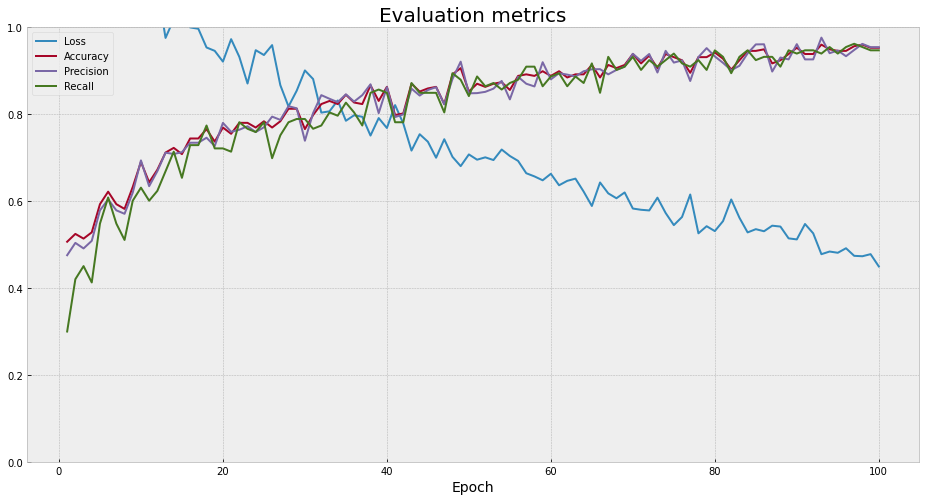

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


with plt.style.context('bmh'):
    
    fig=plt.figure(figsize=[16,8], facecolor='w')
    plt.rcParams['font.size'] = '10'

    rcParams['figure.figsize'] = (18, 8)
    #rcParams['axes.spines.top'] = False
    #rcParams['axes.spines.right'] = False
    plt.ylim([0,1])
    plt.plot(
        np.arange(1, 101), 
        history.history['loss'], label='Loss'
    )
    plt.plot(
        np.arange(1, 101), 
        history.history['accuracy'], label='Accuracy'
    )
    plt.plot(
        np.arange(1, 101), 
        history.history['precision'], label='Precision'
    )
    plt.plot(
        np.arange(1, 101), 
        history.history['recall'], label='Recall'
    )
    plt.title('Evaluation metrics', size=20)
    plt.xlabel('Epoch', size=14)
    plt.legend();
    plt.savefig('EvaluationMetrics.jpeg')

In [24]:

with plt.style.context('bmh'):
    
    fig=plt.figure(figsize=[16,8], facecolor='w')
    matplotlib.rcParams['font.size'] = '29'

    rcParams['figure.figsize'] = (18, 8)
    
    plt.ylim([0,1])
    plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
    plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
    plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
    plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
    plt.title('Evaluation metrics')
    plt.xlabel('Epoch')
    plt.legend()

    
    plt.savefig('EvaluationMetrics.png')
    plt.show()

NameError: name 'matplotlib' is not defined

<Figure size 1152x576 with 0 Axes>

In [25]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    fig=plt.figure(figsize=[14,10], facecolor='w')
    plt.rcParams['font.size'] = '14'
    
    rcParams['figure.figsize'] = (10, 8)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    
    fig, axs = plt.subplots(2)
    
    #fig=plt.figure(figsize=[16,8], facecolor='w')
    plt.rcParams['font.size'] = '28'

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")


    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    
    
    plt.savefig('ErrorAccuracy.pdf')
    
    plt.show()

    

<Figure size 1008x720 with 0 Axes>

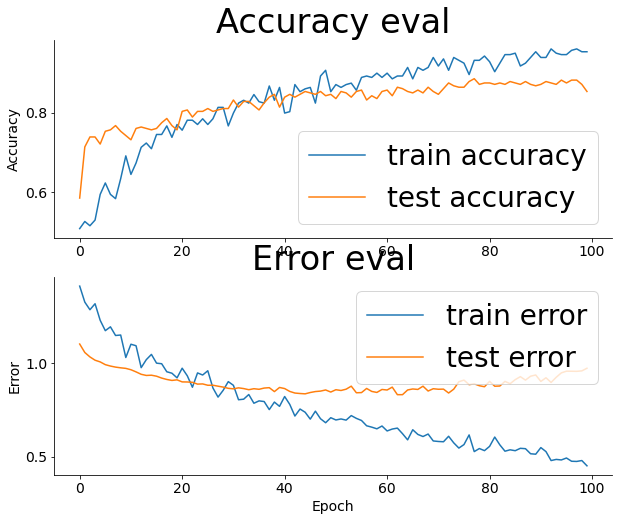

In [26]:
plot_history(history)

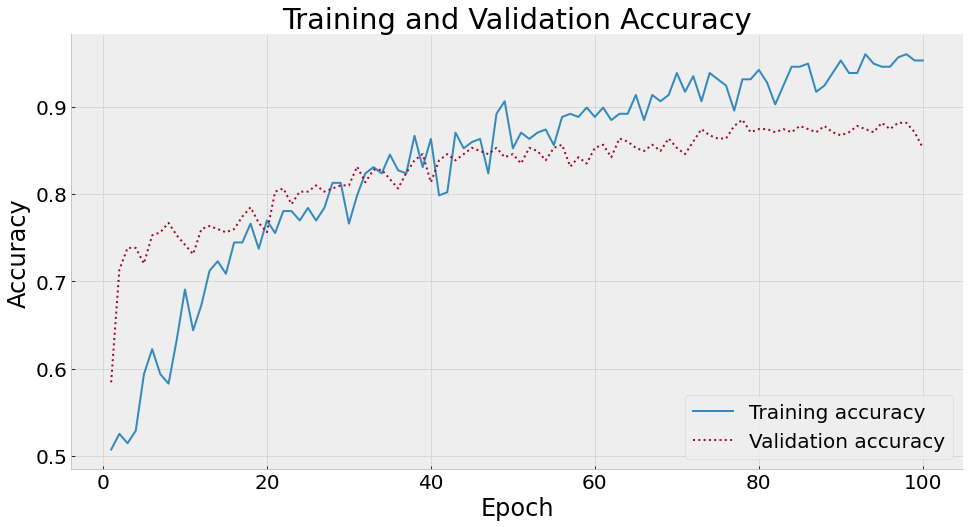

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


with plt.style.context('bmh'):
    
    fig=plt.figure(figsize=[16,8], facecolor='w')
    plt.rcParams['font.size'] = '20'

    rcParams['figure.figsize'] = (18, 8)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    
    acc = history.history['accuracy']
    val = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    plt.savefig('ACCURACY_PLOT.pdf')
    plt.plot()

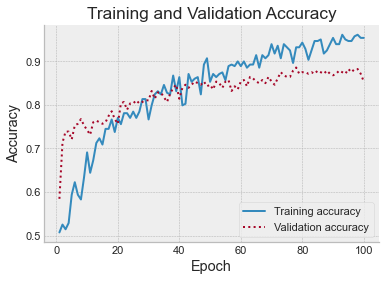

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set()
 
with plt.style.context('bmh'):
    
    
    acc = history.history['accuracy']
    val = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
        
    #rcParams['figure.figsize'] = (10, 8)
    #fig=plt.figure(figsize=[14,8], facecolor='w')
    #plt.rcParams['font.size'] = '15'

        
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
     
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.plot()

In [29]:
model.get_weights()

[array([[-0.03974028, -0.10441579, -0.06188473, ...,  0.06200679,
         -0.03491798, -0.02207339],
        [ 0.03574478, -0.0282014 ,  0.03898888, ..., -0.02434622,
          0.00906719,  0.03420063],
        [ 0.02581083, -0.04057447, -0.03917923, ...,  0.10682592,
          0.07592043, -0.04434564],
        ...,
        [-0.01237179, -0.03841633,  0.00979652, ..., -0.05054816,
          0.00577485, -0.04066789],
        [-0.0459287 , -0.02511756, -0.0356165 , ...,  0.06578855,
         -0.0309572 , -0.04871607],
        [ 0.05737346,  0.05718429,  0.05279858, ..., -0.07521293,
         -0.03381044,  0.02558568]], dtype=float32),
 array([-2.75689736e-02, -1.77464343e-03, -2.50193570e-02, -3.45225856e-02,
        -3.36049832e-02, -1.76214203e-02, -1.21079693e-02, -2.46543381e-02,
        -2.62404215e-02, -2.73137391e-02, -3.54731530e-02, -1.70683190e-02,
        -3.46213430e-02, -2.54414026e-02, -3.29404846e-02, -1.83597803e-02,
        -4.52216230e-02, -2.86550503e-02, -1.84058100e

In [30]:
#To Save the weights of a model and use it for future purpose! 

import os.path 
if os.path.isfile('my_model_weights.h5') is False:
    model.save_weights('my_model_weights.h5')

In [31]:
#this is how we need to save the model! 

#model.save('new_model_check.h5')

In [32]:
predictions_test = model.predict(X_test)
predictions_test

array([[9.99345005e-01],
       [9.99170125e-01],
       [9.83923852e-01],
       [4.75525856e-04],
       [1.24217158e-05],
       [3.29071008e-05],
       [3.30278635e-01],
       [9.09720480e-01],
       [3.49252449e-09],
       [9.99886513e-01],
       [9.93373275e-01],
       [9.99103308e-01],
       [6.36973252e-10],
       [8.62068176e-01],
       [9.99965310e-01],
       [9.65386808e-01],
       [9.99995589e-01],
       [3.03562587e-07],
       [9.99997854e-01],
       [9.74620163e-01],
       [8.04731250e-03],
       [9.93508935e-01],
       [9.99999762e-01],
       [2.44495595e-07],
       [4.79002714e-01],
       [2.31350450e-09],
       [7.79395342e-01],
       [9.99967456e-01],
       [2.60702002e-08],
       [2.80308723e-03],
       [1.00000000e+00],
       [9.99995589e-01],
       [2.33978033e-03],
       [2.98023224e-04],
       [9.99999285e-01],
       [9.77991819e-01],
       [9.96566176e-01],
       [4.35829163e-04],
       [1.75381660e-01],
       [9.99951899e-01],


In [33]:
predictions_test_labels = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions_test)]
print(predictions_test_labels)
print(len(predictions_test_labels))

[1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
239


In [34]:
cm = tf.math.confusion_matrix(
    labels=y_test, predictions=predictions_test_labels)

cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 96,  18],
       [ 16, 109]])>

In [35]:
import matplotlib.pyplot as plt

<Figure size 1152x576 with 0 Axes>

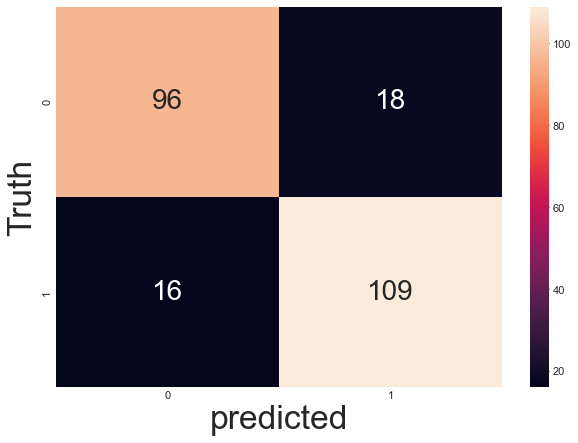

In [36]:
import seaborn as sn

with plt.style.context('bmh'):
    
    fig=plt.figure(figsize=[16,8], facecolor='w')
    plt.rcParams['font.size'] = '28'
    
    plt.figure(figsize=(10,7))
    sn.heatmap(cm,annot=True,fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    plt.savefig('CM.pdf',dpi=300)

In [37]:
#To predict the hotspots in 15LOX1-PEBP1...

data_pred = pd.read_csv('pred_fer_final_new.csv')
data_pred

,Unnamed: 0,SASA.comp,SASA.mon,SASA.del,SASA.rel,SASA.comp/res,SASA.mon/res,SASA.del/res,SASA.rel/res,SASA.comp/ave,...,prop7.G2.residue0,prop7.G2.residue25,prop7.G2.residue50,prop7.G2.residue75,prop7.G2.residue100,prop7.G3.residue0,prop7.G3.residue25,prop7.G3.residue50,prop7.G3.residue75,prop7.G3.residue100
0,0,0.548896,1.950163,2.347757,0.671761,0.146186,1.206096,1.434910,-0.064170,0.788894,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
1,1,-0.180353,-0.296503,-0.247909,-0.083365,-0.292641,-0.505129,-0.362280,-0.314149,0.071798,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
2,2,3.051852,1.892196,-0.557066,-1.236836,3.080357,1.964016,-0.594886,-1.001850,3.783278,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
3,3,1.632396,1.837804,0.957594,-0.200330,1.631735,1.905173,0.821834,-0.319519,2.170690,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
4,4,-0.408337,0.622806,1.406568,1.034597,-0.568175,0.238273,0.899269,0.239480,-0.748072,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,-0.230430,0.781033,1.446964,0.899462,-0.478972,0.211941,0.772647,0.053652,-0.028861,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679
74,74,2.131459,0.927365,-0.988451,-1.500897,2.085479,0.875510,-0.999870,-1.176655,0.545260,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679
75,75,-1.071814,-1.259474,-0.709022,1.033196,-1.128041,-1.445518,-0.737016,0.492510,-0.901456,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679
76,76,-0.621728,0.438505,1.366453,1.226486,-0.392857,1.437213,2.294724,1.501558,-0.473003,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679


In [38]:
data_pred2 = data_pred.iloc[:,1:]
data_pred2

,SASA.comp,SASA.mon,SASA.del,SASA.rel,SASA.comp/res,SASA.mon/res,SASA.del/res,SASA.rel/res,SASA.comp/ave,SASA.mon/ave,...,prop7.G2.residue0,prop7.G2.residue25,prop7.G2.residue50,prop7.G2.residue75,prop7.G2.residue100,prop7.G3.residue0,prop7.G3.residue25,prop7.G3.residue50,prop7.G3.residue75,prop7.G3.residue100
0,0.548896,1.950163,2.347757,0.671761,0.146186,1.206096,1.434910,-0.064170,0.788894,2.203501,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
1,-0.180353,-0.296503,-0.247909,-0.083365,-0.292641,-0.505129,-0.362280,-0.314149,0.071798,0.024164,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
2,3.051852,1.892196,-0.557066,-1.236836,3.080357,1.964016,-0.594886,-1.001850,3.783278,2.432950,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
3,1.632396,1.837804,0.957594,-0.200330,1.631735,1.905173,0.821834,-0.319519,2.170690,2.374286,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
4,-0.408337,0.622806,1.406568,1.034597,-0.568175,0.238273,0.899269,0.239480,-0.748072,-0.552663,...,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,-1.025978,1.025978,1.025978,1.025978,1.025978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.230430,0.781033,1.446964,0.899462,-0.478972,0.211941,0.772647,0.053652,-0.028861,1.038848,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679
74,2.131459,0.927365,-0.988451,-1.500897,2.085479,0.875510,-0.999870,-1.176655,0.545260,-0.188113,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679
75,-1.071814,-1.259474,-0.709022,1.033196,-1.128041,-1.445518,-0.737016,0.492510,-0.901456,-0.966213,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679
76,-0.621728,0.438505,1.366453,1.226486,-0.392857,1.437213,2.294724,1.501558,-0.473003,0.583716,...,0.974679,0.974679,0.974679,0.974679,0.974679,0.974679,-0.974679,-0.974679,-0.974679,-0.974679


In [39]:
pred_on_fer_data = model.predict(data_pred2)
pred_on_fer_data

array([[2.74785776e-07],
       [3.39961989e-05],
       [6.99772471e-08],
       [4.17524234e-06],
       [1.54001573e-05],
       [1.75505877e-04],
       [1.57104164e-01],
       [4.78084585e-05],
       [3.43263149e-04],
       [6.98794538e-05],
       [1.20117486e-01],
       [1.64777040e-04],
       [7.57827411e-06],
       [3.97595722e-05],
       [1.01270462e-06],
       [3.11812758e-03],
       [8.20493698e-03],
       [5.66351414e-03],
       [4.26796832e-05],
       [1.49697065e-04],
       [8.67316425e-01],
       [1.73431635e-03],
       [4.93973494e-04],
       [3.59731019e-02],
       [5.46429401e-05],
       [4.32322440e-06],
       [5.32713045e-07],
       [3.44225805e-06],
       [1.16488570e-06],
       [7.32685521e-06],
       [5.36477164e-05],
       [1.75661917e-05],
       [4.80034259e-06],
       [1.76647305e-03],
       [3.20388079e-02],
       [6.26623631e-04],
       [1.22325873e-05],
       [1.40750408e-03],
       [8.01104307e-03],
       [5.83141625e-01],


In [40]:
predictions_classes_fer = [1 if prob > 0.5 else 0 for prob in np.ravel(pred_on_fer_data)]
print(predictions_classes_fer)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]


In [41]:
for i,v in enumerate(predictions_classes_fer):
    if predictions_classes_fer[i] == 1:
        print(i+1)
        
#RESIDUES 21,65,71,73 are HOTSPOTS.

21
40
45
47
65
67
71
73


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
prediction = model.predict(X)

In [44]:
my_acc = accuracy_score(y, prediction.round())
my_acc

0.8969849246231156

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

ROC_AUC_SCORE : 0.8923508771929825
Function for ROC_AUC_curve : 0.8570526315789473
Threshold value is : 0.18542844


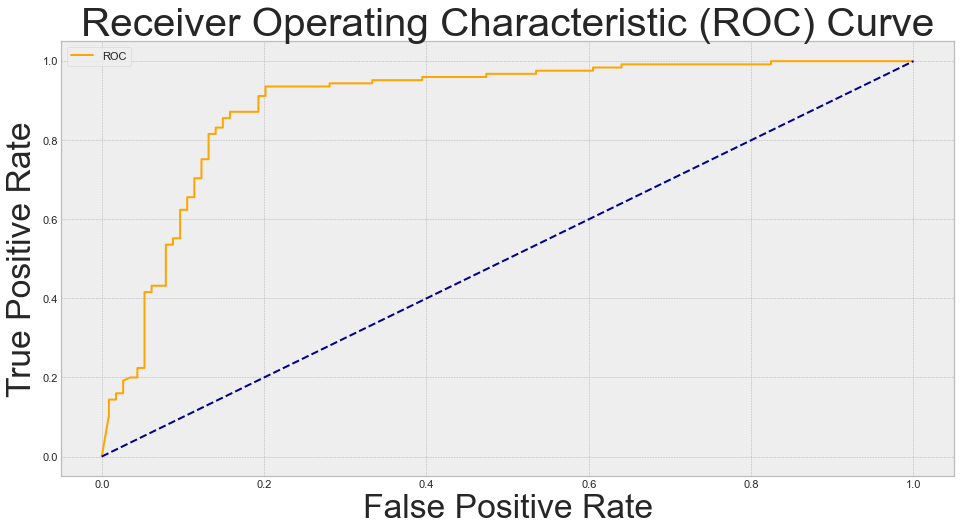

In [46]:
def plot_roc_curve(fpr,tpr):
    with plt.style.context('bmh'):
    
        fig=plt.figure(figsize=[16,8], facecolor='w')
        plt.rcParams['font.size'] = '28'
    
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0,1],[0,1], color='darkblue',linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.savefig('AUC_ROC.png')
        plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test,predictions_test)
roc_curve = auc(fpr,tpr)
print('ROC_AUC_SCORE :', roc_curve)
print('Function for ROC_AUC_curve :', roc_auc_score(y_test,predictions_test_labels ))
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('Threshold value is :', optimal_threshold)
plot_roc_curve(fpr, tpr)


In [47]:
#DifferentMetrics
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, average_precision_score

In [48]:

from sklearn.metrics import classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score

#predicted = lr_load.predict_proba(X_test.values)
#threshold = .38
#predicted [:,0] = (predicted [:,0] < threshold).astype('int')

sensitivity = sensitivity_score(y_test, predictions_test_labels)
specificity = specificity_score(y_test, predictions_test_labels)
f1 = f1_score(y_test, predictions_test_labels)
#mcc_score = matthews_corrcoef(y_test, predictions_test_labels)
roc_score = roc_auc_score(y_test, predictions_test_labels)
accuracy = accuracy_score(y_test, predictions_test_labels)
precision = precision_score(y_test, predictions_test_labels)
recall = recall_score(y_test, predictions_test_labels)
#kappa = cohen_kappa_score(y_test, predictions_test_labels)
#precision_recall = average_precision_score(y_test, predictions_test_labels)

print(round(accuracy,4,)*100, "%")
print(round(f1,4,)*100, "%")
print(round(roc_score,4,)*100, "%")
#print(round(mcc_score,4,)*100, "%")
print(round(sensitivity,4,)*100, "%")
print(round(specificity,4,)*100, "%")

print(round(precision,4,)*100, "%")
print(round(recall,4,)*100, "%")
#print(round(kappa,4,)*100, "%")
#print(round(precision_recall,4,)*100, "%")

85.77 %
86.50999999999999 %
85.71 %
87.2 %
84.21 %
85.83 %
87.2 %


In [49]:
import pandas as pd

data = {'Metrics For Test Set': ["sensitivity", "specificity", "f1", "roc_auc_score", "accuracy_score", "precision_score","recall_score"],
        'Score': [sensitivity_score(y_test, predictions_test_labels), specificity_score(y_test, predictions_test_labels), f1_score(y_test, predictions_test_labels),
                          roc_auc_score(y_test, predictions_test_labels), accuracy_score(y_test, predictions_test_labels), precision_score(y_test, predictions_test_labels), recall_score(y_test, predictions_test_labels)]
        }

df = pd.DataFrame(data)

df



,Metrics For Test Set,Score
0,sensitivity,0.872000
1,specificity,0.842105
2,f1,0.865079
3,roc_auc_score,0.857053
4,accuracy_score,0.857741
5,precision_score,0.858268
6,recall_score,0.872000
